In [246]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [138]:
movies_data = pd.read_csv('tmdb_5000_movies.csv')

In [139]:
movies_credits = pd.read_csv('tmdb_5000_credits.csv')

In [140]:
movies_credits.rename(columns={"movie_id" : "id"}, inplace=True)

In [141]:
movies = pd.merge(movies_data, movies_credits, on=["title", "id"])

In [142]:
jdata = json.loads(movies.genres[0])

In [143]:
json.dumps(jdata) 

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [144]:
#df = pd.DataFrame(jdata)

In [145]:
genres_data = pd.DataFrame()
for j in movies.genres:
    jda = json.loads(j)
    r_data = pd.DataFrame(jda)
    genres_data = pd.concat([df, r_data], axis="index")
genres_data = genres_data.drop_duplicates(subset = "name")

In [146]:
genres_data.index = range(0,genres_data.index.size)

In [147]:
movies['genres'] = movies.genres.transform(json.loads)

In [148]:
def get_movie_type(element):      #定義一個取名字的函數，作用到每一行中去
    type_list = []
    for value in element:
        name = value['name']
        type_list.append(name)
    return ' '.join(type_list)

In [149]:
type_relation = pd.DataFrame()

In [150]:
type_relation['genres'] = movies.genres.transform(get_movie_type)

In [153]:
type_relation['title'] = movies.title

In [161]:
for i in genres_data.name:
    type_relation[i] = type_relation.genres.str.contains(i).astype('int') #將bool變成int

In [162]:
type_relation['release_year'] = pd.to_datetime(movies.release_date).dt.year

In [175]:
groupby_year = type_relation.groupby(type_relation.release_year).sum() #根據年份統計每種類型的合計

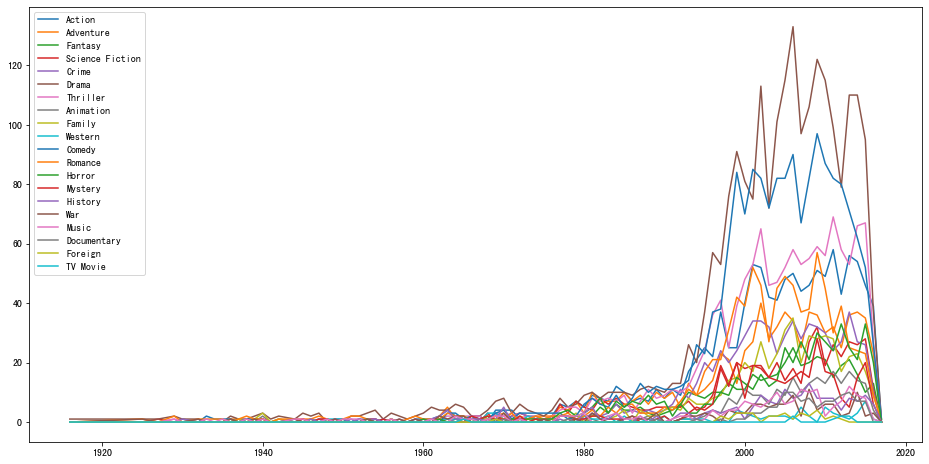

In [177]:
plt.figure(figsize= (16,8))
x = groupby_year.index
for genre in genres_data.name:
    y = groupby_year[genre]
    plt.plot(x, y)
plt.legend(genres_data.name)
plt.show()

In [190]:
data  = pd.DataFrame({'state':['Florida','Florida','Texas','Texas'],
                      'a':[4,5,1,3],
                      'b':[6,10,3,11]
                      })

In [204]:
data

,state,a,b
0,Florida,"[mary, john, oz]",6
1,Florida,"[lee, choi, chan]",10
2,Texas,"[skiy, mof, viki]",3
3,Texas,"[of, mar, kio]",11


In [212]:
def get_name(element):
    listname = []
    for i in element:
        listname.append(i[0].upper())
    return ' '.join(listname)

data.a.transform(get_name)

0    M J O
1    L C C
2    S M V
3    O M K
Name: a, dtype: object

In [220]:
testlist = movies.genres[0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [236]:
def trans_name(self):
    testname = ''
    for i in self:
        testname += i['name'][0].lower()
    return testname

In [237]:
movies.genres.transform(trans_name)[0]

'aafs'

In [238]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [278]:
budgets = movies.loc[:,['title','budget','vote_count','popularity']]
budgets.popularity = budgets.popularity * 1000000
budgets['fit'] = budgets.popularity - budgets.budget

In [281]:
mask = budgets.budget == 0
budgets = budgets.drop(labels=budgets[mask].index)
fit_bar = budgets.sort_values(by = "popularity", ascending = False).head(10)
fit_bar

,title,budget,vote_count,popularity,fit
546,Minions,74000000,4571,875581305.0,801581305.0
95,Interstellar,165000000,10867,724247784.0,559247784.0
788,Deadpool,58000000,10995,514569956.0,456569956.0
94,Guardians of the Galaxy,170000000,9742,481098624.0,311098624.0
127,Mad Max: Fury Road,150000000,9427,434278564.0,284278564.0
28,Jurassic World,150000000,8662,418708552.0,268708552.0
199,Pirates of the Caribbean: The Curse of the Bla...,140000000,6985,271972889.0,131972889.0
82,Dawn of the Planet of the Apes,170000000,4410,243791743.0,73791743.0
200,The Hunger Games: Mockingjay - Part 1,125000000,5584,206227151.0,81227151.0
88,Big Hero 6,165000000,6135,203734590.0,38734590.0


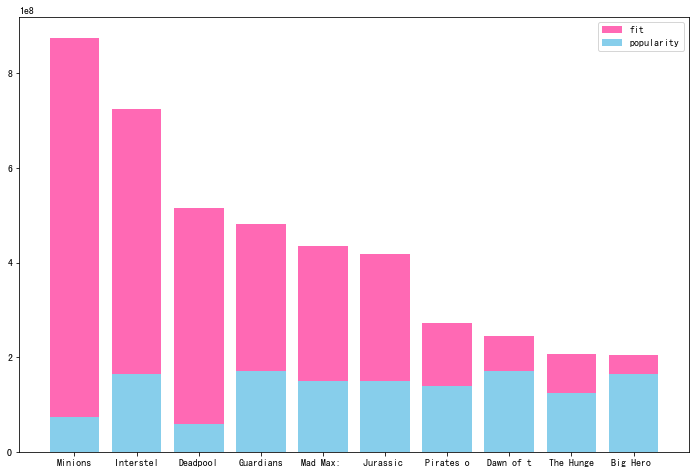

In [310]:
plt.figure(figsize = (12,8))
x_labels = []
for i in fit_bar.title:
    x_labels.append(i[0:9])
plt.bar(x_labels, fit_bar.popularity, color = "hotpink", label = "fit")
plt.bar(x_labels, fit_bar.budget, color = "skyblue", label = "popularity")
plt.legend() 
plt.show()